In [1]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
quandl.ApiConfig.api_key = "hc12Qsz4uPr9Zq_Uq2GP"

In [2]:
def macro_by_country(metric):
    ISO = pd.read_csv('ISO.csv')
    
    metric_df = quandl.get('ODA/{}_{}'.format('USA' , metric))
    
    for i in range(len(ISO)):
        try:
            metric_df[ISO['name'][i]] = quandl.get('ODA/{}_{}'.format(ISO['alpha-3'][i], metric))
        except:
            pass
    
    metric_df = metric_df.drop('Value', axis=1)
    
    return metric_df

In [3]:
NGDPPC = macro_by_country('NGDPDPC')

In [4]:
NGDPPC_2000 = NGDPPC['2000':]
NGDPPC_2000 = NGDPPC_2000.dropna(axis=1)

In [5]:
GDP_growth_pc = (NGDPPC_2000.iloc[22]/NGDPPC_2000.iloc[0] - 1) * 100

Text(0.5, 1.0, 'Top 10 Fastest Growing Economies 2000-2022 GDP Per Capita')

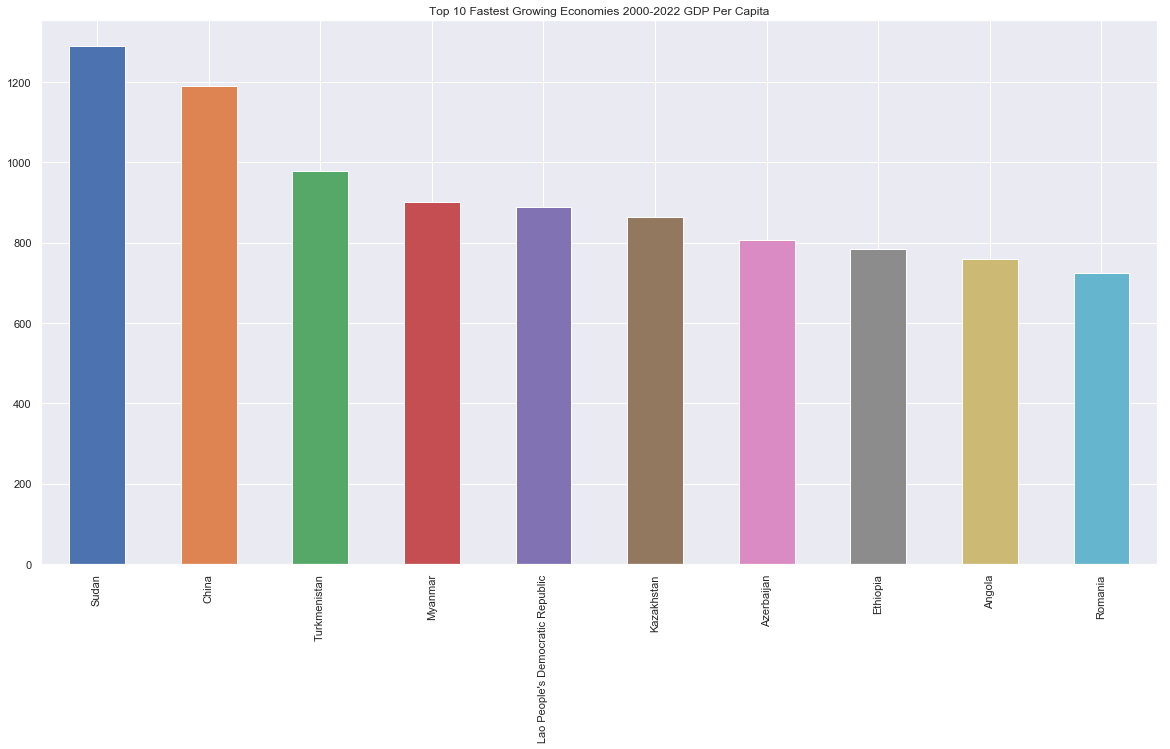

In [6]:
plt.figure(figsize=(20,10))
GDP_growth_pc.sort_values(ascending=False)[:10].plot.bar()
plt.title('Top 10 Fastest Growing Economies 2000-2022 GDP Per Capita')

Text(0.5, 1.0, 'Top 10 Fastest Growing Economies 2000-2018 GDP Per Capita')

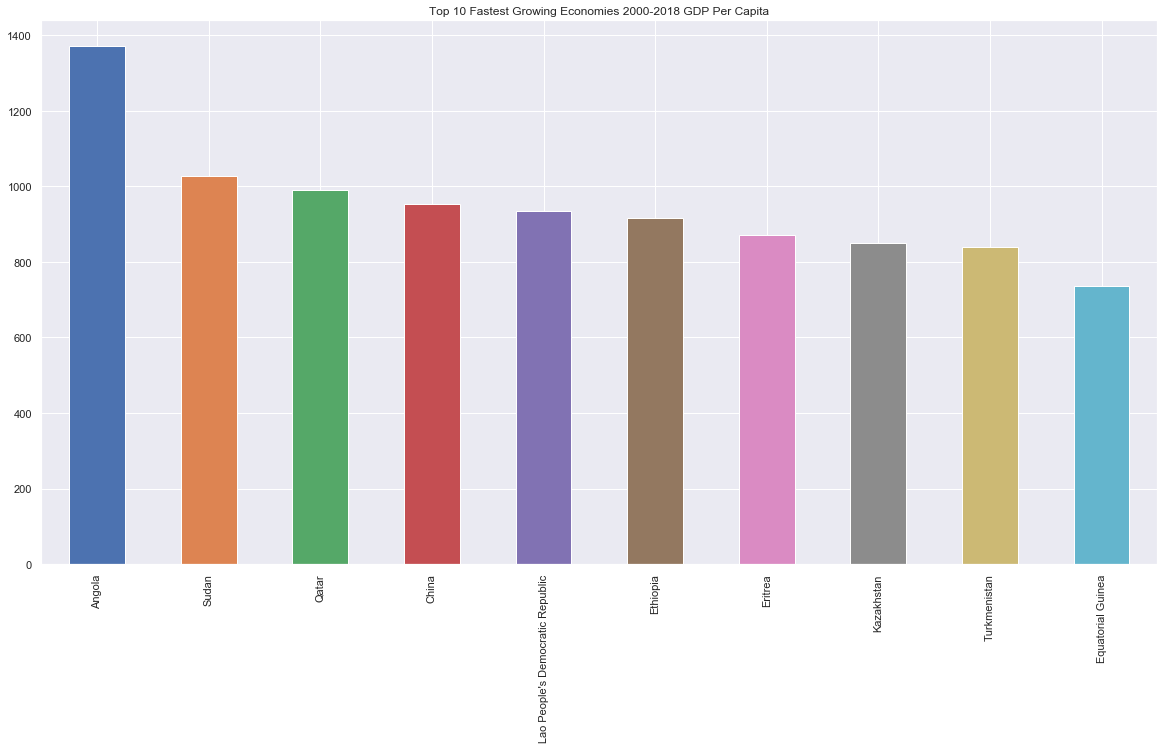

In [7]:
NGDP = macro_by_country('NGDPD')
NGDP_2000 = NGDP['2000':'2018']
NGDP_2000 = NGDP_2000.dropna(axis=1)

GDP_growth = (NGDP_2000.iloc[18]/NGDP_2000.iloc[0] - 1) * 100

plt.figure(figsize=(20,10))
GDP_growth.sort_values(ascending=False)[:10].plot.bar()
plt.title('Top 10 Fastest Growing Economies 2000-2018 GDP')

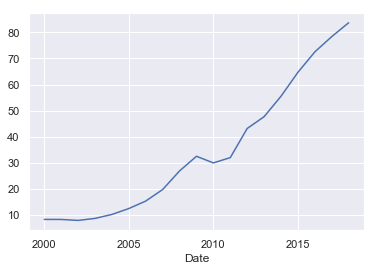

In [17]:
NGDP_2000['Ethiopia'].plot()